In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("APL.csv")

In [3]:
#As there can be some misunderstandings, I am changing Female to Non-Cis Male

data["Gender"] = data["Gender"].replace(["FEMALE"],["NON-CIS MALE"])
data["Gender"] = data["Gender"].replace(["Male"],["MALE"])
data["UG"] = data["UG"].replace(["YIF"],["23"])
data = data.rename(columns={'PRICE in TIER 5.0(in Million)': 'PRICE in APL 5.0(in Million)'})

In [4]:
data.head()

,NAME,Gender,UG,TIER 5.0,APL 5.0,TEAM,PRICE in APL 5.0(in Million),APL 6.0,TIER 6.0,PRICE In APL 6.0,POSITION,ALTERNATE POSITION,Unnamed: 12,VISIBLE PHOTO,MEAN_TIER,COUNT_APL,MEAN_PRICE
0,Pranav Wali,MALE,22,1.0,YES,Humans of Sonipat,52.0,YES,1.0,95.0,DEFENDER,WINGER,NaN,no,1.0,2,73.5
1,DHRTHI BHAT,NON-CIS MALE,23,1.0,YES,SUIICIDE SQUAD,32.0,YES,1.0,30.0,MIDFIELDER,FORWARD,NaN,yes,1.0,2,31.0
2,Shivranjani Kumari,NON-CIS MALE,22,1.0,YES,HR26,36.0,NO,NaN,NaN,GOALKEEPER,NaN,NaN,yes,0.5,1,18.0
3,ARYAN RAMACHANDRAN,MALE,22,1.0,YES,A-Z,49.0,YES,1.0,77.0,MIDFIELDER,DEFENDER,NaN,yes,1.0,2,63.0
4,RADHA LATH GUPTA,NON-CIS MALE,22,1.0,YES,A-Z,37.0,NO,NaN,NaN,WINGER,MIDFIELDER,NaN,no,0.5,1,18.5


#Now, we will first have some data analysis to show the involvement of women in APL

Comparing Differences of prices between male and non-cis male. The resulting values will be positive if the player is more expensive than the average female player, and negative if the player is less expensive than the average non-cis male player. 

In [5]:
data["cost_diff"] = data["MEAN_PRICE"]-data[data["Gender"]=="NON-CIS MALE"]["MEAN_PRICE"].mean()
data.tail()

,NAME,Gender,UG,TIER 5.0,APL 5.0,TEAM,PRICE in APL 5.0(in Million),APL 6.0,TIER 6.0,PRICE In APL 6.0,POSITION,ALTERNATE POSITION,Unnamed: 12,VISIBLE PHOTO,MEAN_TIER,COUNT_APL,MEAN_PRICE,cost_diff
93,REET DARA,NON-CIS MALE,NaN,NaN,NO,NaN,NaN,YES,2.0,12.0,ATTACKER,MIDFIELDER,NaN,yes,1.0,1,6.0,-4.988095
94,KEERTHANA SUDARSHAN,NON-CIS MALE,24,NaN,NO,NaN,NaN,YES,2.0,9.0,DEFENDER,MIDFIELDER,NaN,yes,1.0,1,4.5,-6.488095
95,ANYA GOSAIN,NON-CIS MALE,25,NaN,NO,NaN,NaN,YES,3.0,6.0,ATTACKER,MIDFIELDER,NaN,yes,1.5,1,3.0,-7.988095
96,VEDA D,NON-CIS MALE,23,NaN,NO,NaN,NaN,YES,3.0,2.0,GOALKEEPER,DEFENDER,NaN,yes,1.5,1,1.0,-9.988095
97,SOFIA BAGOLIN,NON-CIS MALE,23,NaN,NO,NaN,NaN,YES,4.0,NaN,MIDFIELDER,DEFENDER,NaN,yes,2.0,1,0.0,-10.988095


Creating a histogram of the cost difference. The resulting histogram shows the distribution of the cost difference between male and non-cis male players. We can see that the histogram is right skewed which means that there is a price discrimation with male players being more expensive than non-cis players.

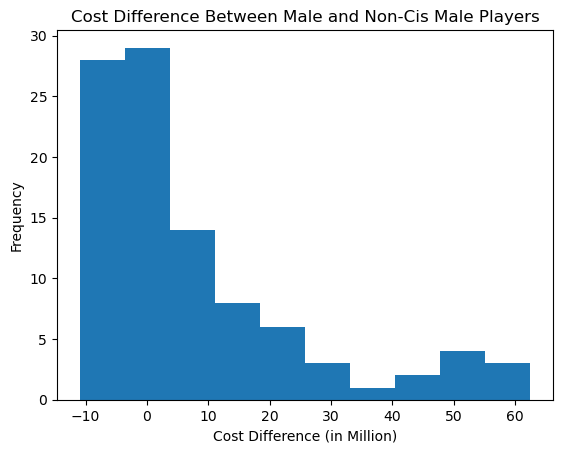

In [6]:
# 
plt.hist(data["cost_diff"])
plt.title("Cost Difference Between Male and Non-Cis Male Players")
plt.xlabel("Cost Difference (in Million)")
plt.ylabel("Frequency")
plt.show()
plt.show()


Next, we will compute the number of non-cis players in each batch and each team.

In [7]:
#For APL 5.0
non_cismen_batch_count_5 = data[data["Gender"] == "NON-CIS MALE"]["UG"].value_counts()
print("Number of non-cis men players in each batch in APL 5.0:\n", non_cismen_batch_count_5)

non_cismen_team_count_5 = data[data["Gender"] == "NON-CIS MALE"]["TEAM"].value_counts()
print("\nNumber of non-cis men players in each team in APL 5.0:\n", non_cismen_team_count_5)

# For APL 6.0
non_cis_batch_count_6 = data[data["Gender"] == "NON-CIS MALE"][data["APL 6.0"] == "YES"]["UG"].value_counts()
print("\nNumber of non-cis men players in each batch in APL 6.0:\n", non_cis_batch_count_6)

non_cismen_team_count_6 = data[data["Gender"] == "NON-CIS MALE"]["APL 6.0"].value_counts()
print("\nNumber of non-cis men players in each team in APL 6.0:\n", non_cismen_team_count_6)


# For APL 5.0
male_batch_count_5 = data[data["Gender"] == "MALE"]["UG"].value_counts()
print("Number of male players in each batch in APL 5.0:\n", male_batch_count_5)

male_team_count_5 = data[data["Gender"] == "MALE"]["TEAM"].value_counts()
print("\nNumber of male players in each team in APL 5.0:\n", male_team_count_5)

# For APL 6.0
male_batch_count_6 = data[data["Gender"] == "MALE"][data["APL 6.0"] == "YES"]["UG"].value_counts()
print("\nNumber of male players in each batch in APL 6.0:\n", male_batch_count_6)

male_team_count_6 = data[data["Gender"] == "MALE"]["APL 6.0"].value_counts()
print("\nNumber of male players in each team in APL 6.0:\n", male_team_count_6)

Number of non-cis men players in each batch in APL 5.0:
 UG
24    14
22    12
23    11
25     3
21     1
Name: count, dtype: int64

Number of non-cis men players in each team in APL 5.0:
 TEAM
SUIICIDE SQUAD        2
ONLY GODS FC          2
A-Z                   2
CHAKRAVYUH            2
THOSE ASHOKA GIRLS    2
FZ WARRIORS           2
ASHUKU MUTATA         2
HR26                  2
THE MONEY TEAM        2
HASBULLA FC           2
HYPEFLY               2
Humans of Sonipat     1
JAI MATA DI FC        1
AFC SPOTTED BALLS     1
VANAR SENA            1
DHOOMKETU FC          1
COMPEX MADRID FC      1
BHARAT FC             1
BABITA JI FC          1
Name: count, dtype: int64

Number of non-cis men players in each batch in APL 6.0:
 UG
23    9
22    7
24    7
25    3
Name: count, dtype: int64

Number of non-cis men players in each team in APL 6.0:
 APL 6.0
YES    27
NO     15
Name: count, dtype: int64
Number of male players in each batch in APL 5.0:
 UG
22    25
23    14
24    13
25     1
Name: 

C:\Users\CH\AppData\Local\Temp\ipykernel_11584\2387276189.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_cis_batch_count_6 = data[data["Gender"] == "NON-CIS MALE"][data["APL 6.0"] == "YES"]["UG"].value_counts()
C:\Users\CH\AppData\Local\Temp\ipykernel_11584\2387276189.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_batch_count_6 = data[data["Gender"] == "MALE"][data["APL 6.0"] == "YES"]["UG"].value_counts()


C:\Users\CH\AppData\Local\Temp\ipykernel_11584\4159258200.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_batch_counts_6 = data[data["Gender"] == "MALE"][data["APL 6.0"] == "YES"]["UG"].value_counts()
C:\Users\CH\AppData\Local\Temp\ipykernel_11584\4159258200.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_cis_batch_counts_6 = data[data["Gender"] == "NON-CIS MALE"][data["APL 6.0"] == "YES"]["UG"].value_counts()


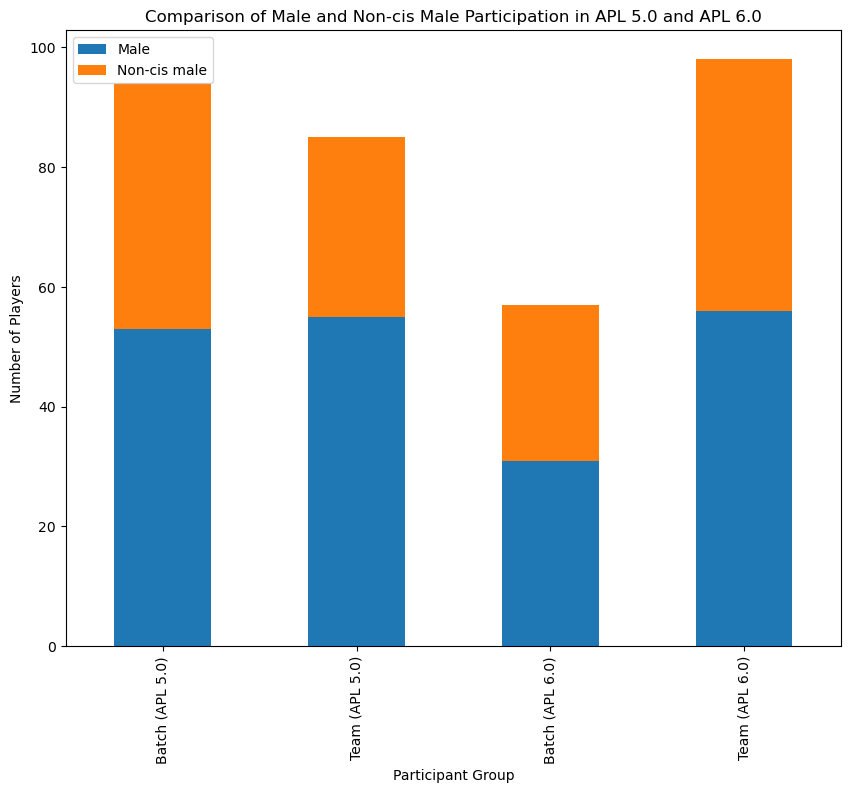

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the counts of male and non-cis male players for each batch and team
male_batch_counts_5 = data[data["Gender"] == "MALE"]["UG"].value_counts()
male_team_counts_5 = data[data["Gender"] == "MALE"]["TEAM"].value_counts()
male_batch_counts_6 = data[data["Gender"] == "MALE"][data["APL 6.0"] == "YES"]["UG"].value_counts()
male_team_counts_6 = data[data["Gender"] == "MALE"]["APL 6.0"].value_counts()

non_cis_batch_counts_5 = data[data["Gender"] == "NON-CIS MALE"]["UG"].value_counts()
non_cis_team_counts_5 = data[data["Gender"] == "NON-CIS MALE"]["TEAM"].value_counts()
non_cis_batch_counts_6 = data[data["Gender"] == "NON-CIS MALE"][data["APL 6.0"] == "YES"]["UG"].value_counts()
non_cis_team_counts_6 = data[data["Gender"] == "NON-CIS MALE"]["APL 6.0"].value_counts()

# Create a new DataFrame with the counts of male and non-cis male players
df_counts = pd.DataFrame({
    "Male": [male_batch_counts_5.sum(), male_team_counts_5.sum(), male_batch_counts_6.sum(), male_team_counts_6.sum()],
    "Non-cis male": [non_cis_batch_counts_5.sum(), non_cis_team_counts_5.sum(), non_cis_batch_counts_6.sum(), non_cis_team_counts_6.sum()]
}, index=["Batch (APL 5.0)", "Team (APL 5.0)", "Batch (APL 6.0)", "Team (APL 6.0)"])

# Create a stacked bar chart
ax = df_counts.plot(kind="bar", stacked=True, figsize=(10, 8))

# Set the title and axis labels
ax.set_title("Comparison of Male and Non-cis Male Participation in APL 5.0 and APL 6.0")
ax.set_xlabel("Participant Group")
ax.set_ylabel("Number of Players")

# Show the plot
plt.show()

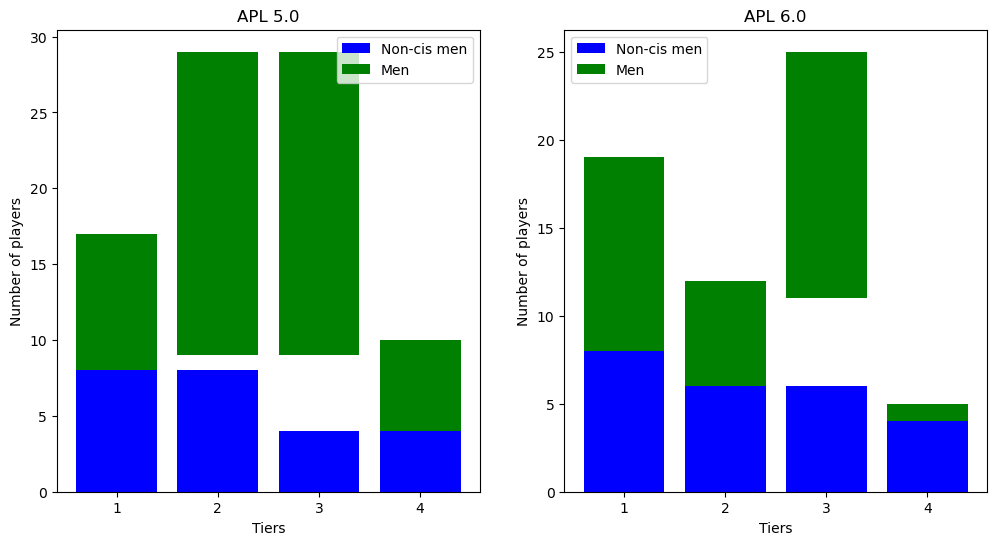

In [9]:
# For APL 5.0
non_cismen_tier_count_5 = data[data["Gender"] == "NON-CIS MALE"]["TIER 5.0"].value_counts()
cismen_tier_count_5 = data[data["Gender"] == "MALE"]["TIER 5.0"].value_counts()

# For APL 6.0
non_cismen_tier_count_6 = data[data["Gender"] == "NON-CIS MALE"]["TIER 6.0"].value_counts()
cismen_tier_count_6 = data[data["Gender"] == "MALE"]["TIER 6.0"].value_counts()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for APL 5.0
axs[0].bar(non_cismen_tier_count_5.index, non_cismen_tier_count_5.values, color='b', label='Non-cis men')
axs[0].bar(cismen_tier_count_5.index, cismen_tier_count_5.values, bottom=non_cismen_tier_count_5.values, color='g', label='Men')
axs[0].set_title('APL 5.0')
axs[0].set_xlabel('Tiers')
axs[0].set_ylabel('Number of players')
axs[0].set_xticks([1, 2, 3, 4])
axs[0].legend()

# Plot for APL 6.0
axs[1].bar(non_cismen_tier_count_6.index, non_cismen_tier_count_6.values, color='b', label='Non-cis men')
axs[1].bar(cismen_tier_count_6.index, cismen_tier_count_6.values, bottom=non_cismen_tier_count_6.values, color='g', label='Men')
axs[1].set_title('APL 6.0')
axs[1].set_xlabel('Tiers')
axs[1].set_ylabel('Number of players')
axs[1].set_xticks([1, 2, 3, 4])
axs[1].legend()

plt.show()

In [10]:
list(data)

['NAME',
 'Gender',
 'UG',
 'TIER 5.0',
 'APL 5.0',
 'TEAM',
 'PRICE in APL 5.0(in Million)',
 'APL 6.0',
 'TIER 6.0',
 'PRICE In APL 6.0',
 'POSITION',
 'ALTERNATE POSITION',
 'Unnamed: 12',
 'VISIBLE PHOTO',
 'MEAN_TIER',
 'COUNT_APL',
 'MEAN_PRICE',
 'cost_diff']

In [11]:
data

,NAME,Gender,UG,TIER 5.0,APL 5.0,TEAM,PRICE in APL 5.0(in Million),APL 6.0,TIER 6.0,PRICE In APL 6.0,POSITION,ALTERNATE POSITION,Unnamed: 12,VISIBLE PHOTO,MEAN_TIER,COUNT_APL,MEAN_PRICE,cost_diff
0,Pranav Wali,MALE,22,1.0,YES,Humans of Sonipat,52.0,YES,1.0,95.0,DEFENDER,WINGER,NaN,no,1.0,2,73.5,62.511905
1,DHRTHI BHAT,NON-CIS MALE,23,1.0,YES,SUIICIDE SQUAD,32.0,YES,1.0,30.0,MIDFIELDER,FORWARD,NaN,yes,1.0,2,31.0,20.011905
2,Shivranjani Kumari,NON-CIS MALE,22,1.0,YES,HR26,36.0,NO,NaN,NaN,GOALKEEPER,NaN,NaN,yes,0.5,1,18.0,7.011905
3,ARYAN RAMACHANDRAN,MALE,22,1.0,YES,A-Z,49.0,YES,1.0,77.0,MIDFIELDER,DEFENDER,NaN,yes,1.0,2,63.0,52.011905
4,RADHA LATH GUPTA,NON-CIS MALE,22,1.0,YES,A-Z,37.0,NO,NaN,NaN,WINGER,MIDFIELDER,NaN,no,0.5,1,18.5,7.511905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,REET DARA,NON-CIS MALE,NaN,NaN,NO,NaN,NaN,YES,2.0,12.0,ATTACKER,MIDFIELDER,NaN,yes,1.0,1,6.0,-4.988095
94,KEERTHANA SUDARSHAN,NON-CIS MALE,24,NaN,NO,NaN,NaN,YES,2.0,9.0,DEFENDER,MIDFIELDER,NaN,yes,1.0,1,4.5,-6.488095
95,ANYA GOSAIN,NON-CIS MALE,25,NaN,NO,NaN,NaN,YES,3.0,6.0,ATTACKER,MIDFIELDER,NaN,yes,1.5,1,3.0,-7.988095
96,VEDA D,NON-CIS MALE,23,NaN,NO,NaN,NaN,YES,3.0,2.0,GOALKEEPER,DEFENDER,NaN,yes,1.5,1,1.0,-9.988095


In [12]:
X = data[['Gender', 'UG', 'MEAN_TIER', 'COUNT_APL', 'TEAM', 'MEAN_PRICE', 'POSITION', 'ALTERNATE POSITION']]
y = data['APL 6.0']

In [13]:
X = pd.get_dummies(X, columns=['Gender', 'TEAM', 'POSITION', 'ALTERNATE POSITION'])
X

,UG,MEAN_TIER,COUNT_APL,MEAN_PRICE,Gender_MALE,Gender_NON-CIS MALE,TEAM_A-Z,TEAM_AFC SPOTTED BALLS,TEAM_ASHUKU MUTATA,TEAM_BABITA JI FC,...,POSITION_FORWARD,POSITION_GOALKEEPER,POSITION_MIDFIELDER,POSITION_WINGER,ALTERNATE POSITION_ATTACKER,ALTERNATE POSITION_DEFENDER,ALTERNATE POSITION_FORWARD,ALTERNATE POSITION_GOALKEEPER,ALTERNATE POSITION_MIDFIELDER,ALTERNATE POSITION_WINGER
0,22,1.0,2,73.5,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,23,1.0,2,31.0,False,True,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
2,22,0.5,1,18.0,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,22,1.0,2,63.0,True,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,22,0.5,1,18.5,False,True,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,NaN,1.0,1,6.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
94,24,1.0,1,4.5,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
95,25,1.5,1,3.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
96,23,1.5,1,1.0,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# drop rows with missing values
X_train_dropped = X_train.dropna()
y_train_dropped = y_train[X_train.index.isin(X_train_dropped.index)]

# create the logistic regression object and fit the dropped data
lr = LogisticRegression(penalty='l2')
lr.fit(X_train_dropped, y_train_dropped)

C:\Users\CH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
# drop missing values from test data
X_test_dropped = X_test.dropna()
y_test_dropped = y_test[X_test.index.isin(X_test_dropped.index)]

# predict the labels for the test data
y_pred = lr.predict(X_test_dropped)

# generate a classification report
print(classification_report(y_test_dropped, y_pred))

              precision    recall  f1-score   support

          NO       0.88      1.00      0.93         7
         YES       1.00      0.92      0.96        12

    accuracy                           0.95        19
   macro avg       0.94      0.96      0.94        19
weighted avg       0.95      0.95      0.95        19

